<a href="https://colab.research.google.com/github/aizardar/tensorflow-tutorials/blob/master/tutorials/Linear_classifier_MNIST_handwritten_digit_dataset_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A linear classifier for the MNIST handwritten digit dataset in **TensorFlow** (Inspired from https://harishnarayanan.org/writing/artistic-style-transfer/)

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.cmap'] = 'Greys'

In [0]:
import numpy as np
np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)

In [0]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
print (mnist.train.images.shape)
print (mnist.train.labels.shape)

(55000, 784)
(55000, 10)


In [0]:
print (mnist.test.images.shape)
print (mnist.test.labels.shape)

(10000, 784)
(10000, 10)


[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.16
 0.6  1.   0.6  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.37 0.89
 0.99 0.99 0.89 0.   0.   0.36 0.05 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.3  0.98 0.99
 0.99 0.99 0.89 0.   0.41 0.98 0.85 0.34 0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.

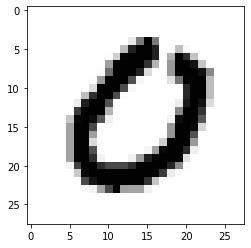

In [0]:
example_image = mnist.train.images[7]
example_image_reshaped = example_image.reshape((28, 28)) # Can't render a line of 784 numbers
example_label = mnist.train.labels[7]

print (example_image)
plt.imshow(example_image_reshaped)


In [0]:
print (example_label)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# **Setting up a score function, loss function and optimisation algorithm**

# Placeholders to hold batches of this training data **bold text** **bold text**

In [0]:
x_train = tf.placeholder(tf.float32, [None,784])
y_train = tf.placeholder(tf.float32, [None,10])

# Setting up **paramters**

In [0]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x_train,W) + b)

# We define our loss function to measure how poorly this model performs on images with known labels. We use the a specific form called the cross entropy loss.**bold text**

In [0]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_train*tf.log(y), reduction_indices=[1]))


In [0]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)


# Training the **model**

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# We train the model iteratively for 1000 steps, loading a batch of example images each time.**bold text**

In [0]:
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x_train: batch_xs, y_train: batch_ys})

In [0]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_train, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x_train: mnist.test.images, y_train: mnist.test.labels}))

0.919
